<a href="https://colab.research.google.com/github/ranamaddy/ImageProcessing/blob/main/l2_image_semengtation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab.patches import cv2_imshow

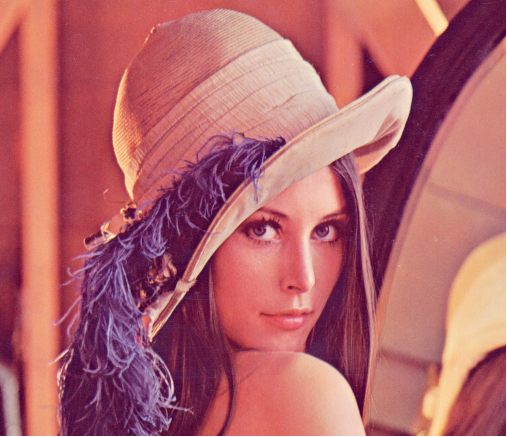

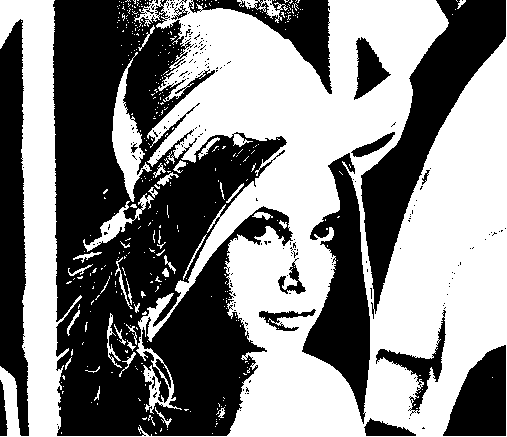

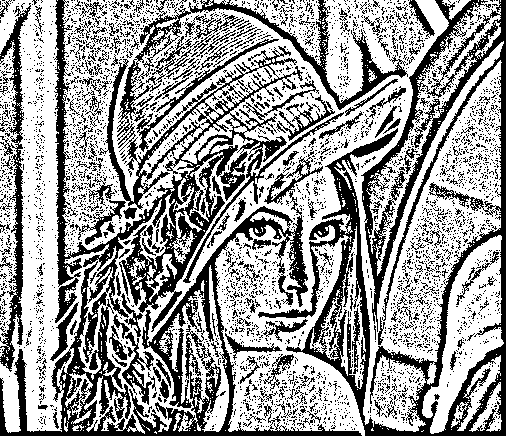

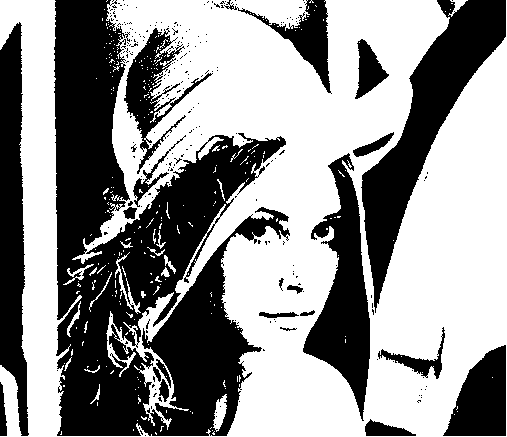

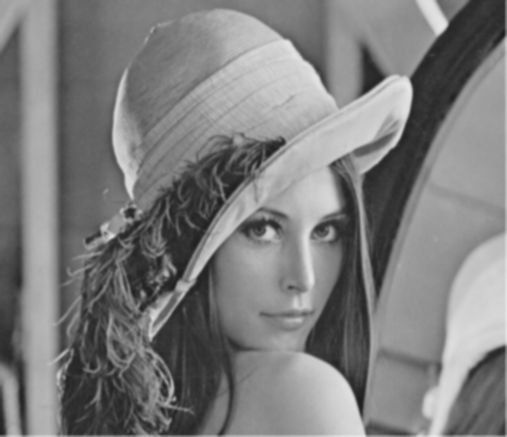

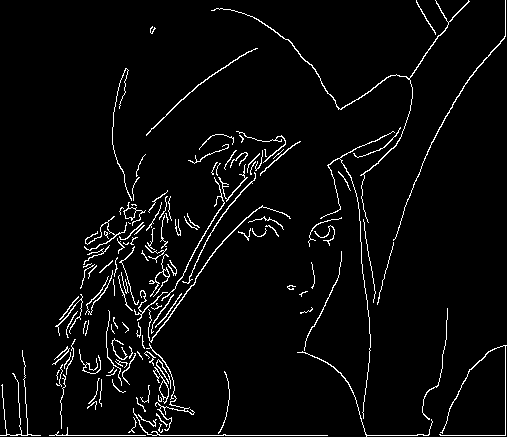

In [10]:
# raad image and apply basic imag different segmentation 
import cv2
# Read image
img = cv2.imread('abc.png')
# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply thresholding
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# Apply adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
# Apply Otsu's thresholding
ret2, otsu_thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Apply Gaussian blur
blur = cv2.GaussianBlur(gray, (5,5), 0)
# Apply Canny edge detection
edges = cv2.Canny(blur, 100, 200)
# Display all the segmented images

# Display original image
cv2_imshow( img)  
# Display thresholded image
cv2_imshow( thresh)
# Display adaptive thresholded image
cv2_imshow( adaptive_thresh)
# Display Otsu's thresholded image
cv2_imshow( otsu_thresh)
# Display blurred
cv2_imshow( blur)
# Display edges
cv2_imshow( edges)






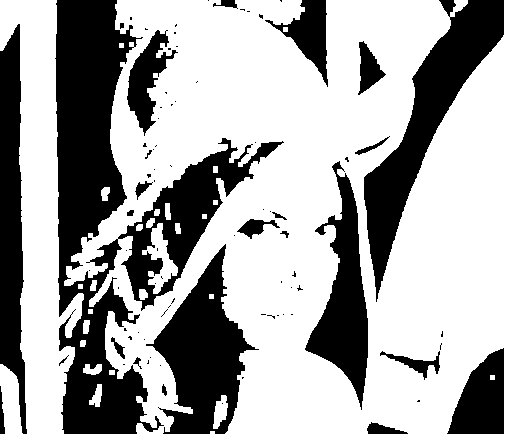

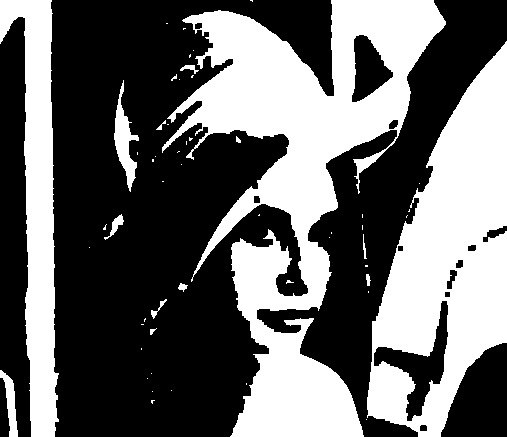

In [17]:
# Apply dilation and erosion
import numpy as np

kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(thresh, kernel, iterations=1)
erosion = cv2.erode(thresh, kernel, iterations=1)
# Display dilation
cv2_imshow(dilation)
# Display erosion
cv2_imshow(erosion)

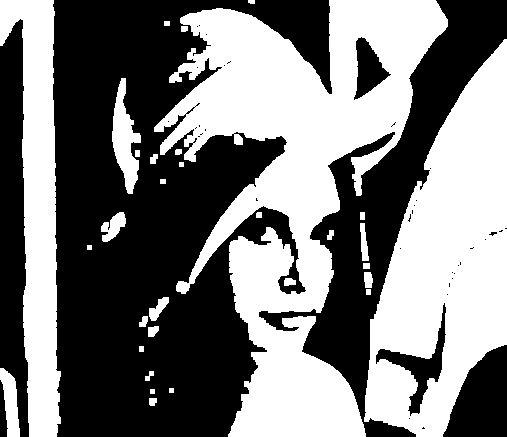

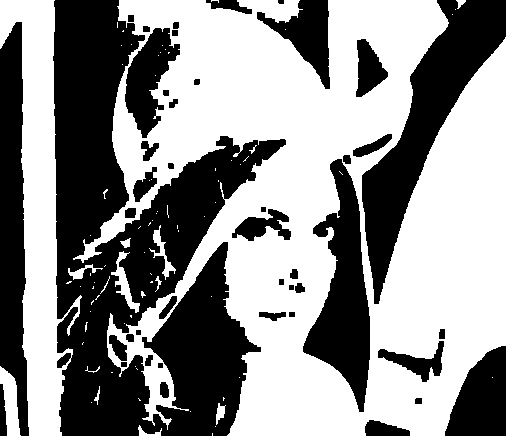

In [18]:
# Apply morphological opening and closing
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
# Display opening
cv2_imshow(opening)
# Display closing
cv2_imshow(closing)

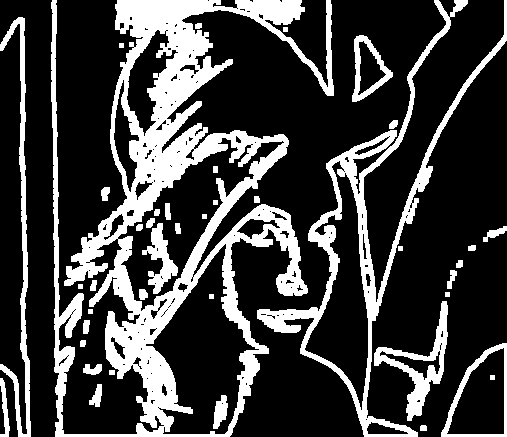

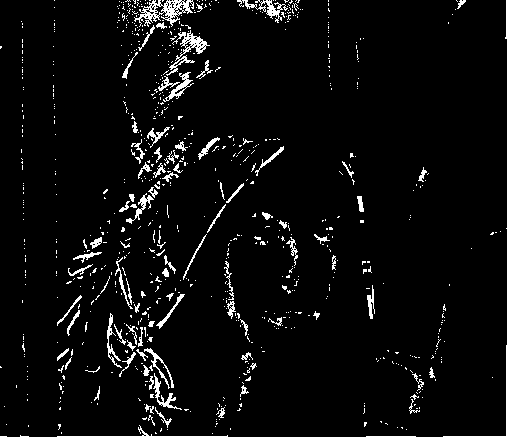

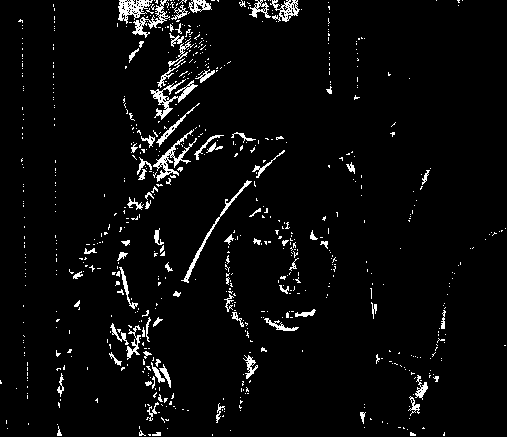

In [19]:
# Apply morphological gradient
gradient = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel)
# Display gradient
cv2_imshow(gradient)
# Apply morphological top hat and black hat
tophat = cv2.morphologyEx(thresh, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(thresh, cv2.MORPH_BLACKHAT, kernel)
# Display top hat
cv2_imshow(tophat)
# Display black hat
cv2_imshow(blackhat)

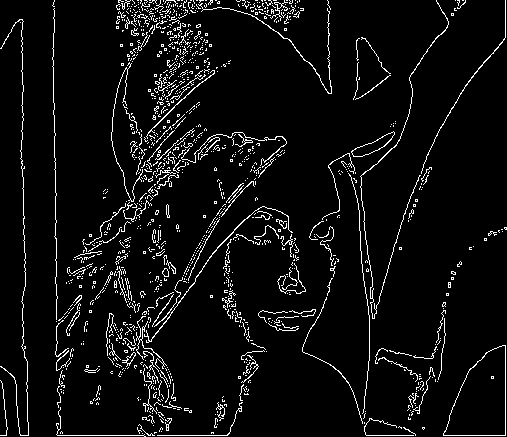

In [20]:
# Apply Canny edge detection
canny = cv2.Canny(thresh, 100, 200)
# Display canny
cv2_imshow(canny)

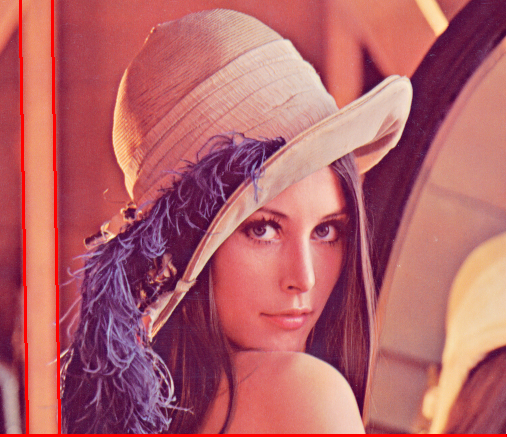

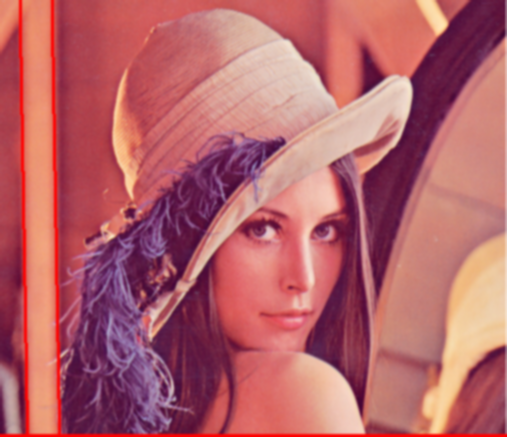

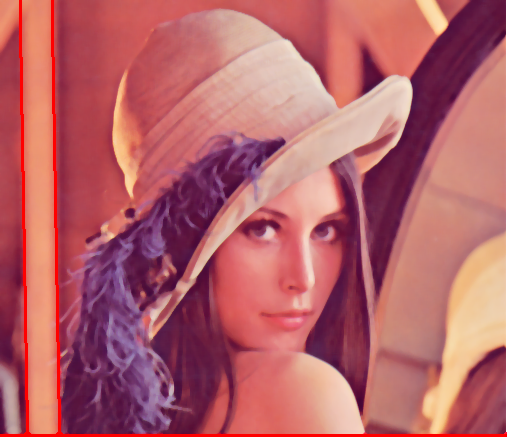

In [22]:
# Apply Hough line transform on canny image
lines = cv2.HoughLines(canny, 1, np.pi/180, 150)
# Draw detected lines on original image
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 =b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img, (x1,y1), (x2,y2), (0,0,255), 2)
# Display image with detected lines
cv2_imshow(img)# Apply Gaussian blur
blur = cv2.GaussianBlur(img, (5,5), 0)
# Display blurred image
cv2_imshow(blur)
# Apply median blur
median = cv2.medianBlur(img, 5)
# Display median blurred image
cv2_imshow(median)


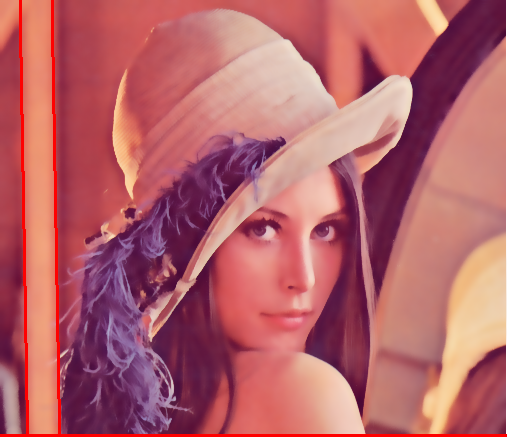

In [24]:
#The given code applies various image processing techniques on an image. The next set of code will perform the following operations:
#1. Apply bilateral filter on the original image
#2. Display the filtered image

# Apply bilateral filter on the original image
bilateral = cv2.bilateralFilter(img, 9, 75, 75)
# Display the filtered image
cv2_imshow(bilateral)


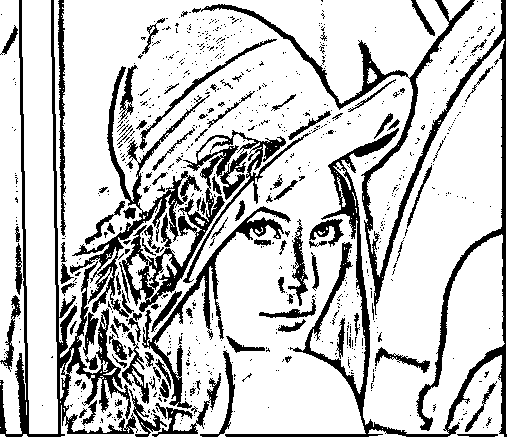

In [29]:
#3. Apply adaptive thresholding on the filtered image
#4. Display the thresholded image
# Apply adaptive thresholding on the filtered image
# Convert the filtered image to grayscale

gray = cv2.cvtColor(bilateral, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding on the grayscale image

thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
# Display the thresholded image
cv2_imshow(thresh)  



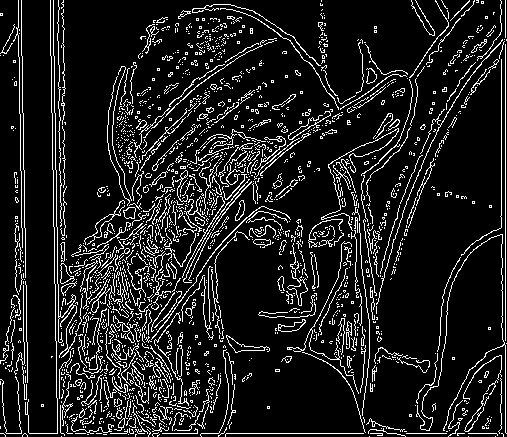

In [30]:
#5. Apply Canny edge detection on the thresholded image

#6. Display the edges detected image

# Apply Canny edge detection on the thresholded image

edges = cv2.Canny(thresh, 100, 200)
# Display the edges detected image
cv2_imshow(edges)



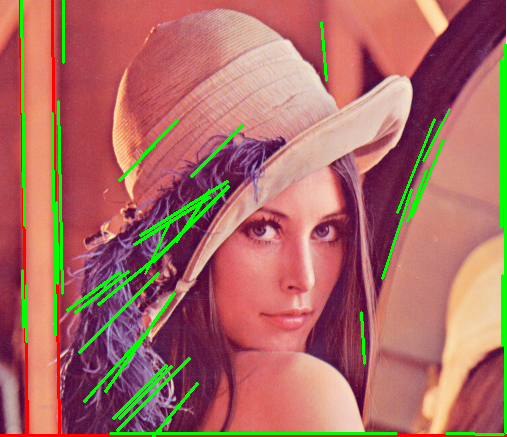

In [31]:
#7. Apply Hough line transform on the edges detected image
#8. Display the original image with detected lines
# Apply Hough line transform on the edges detected image
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=50, maxLineGap=5)
# Draw the detected lines on the original image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    # Apply Canny edge detection on the thresholded image# Display the original image with detected lines
cv2_imshow(img)

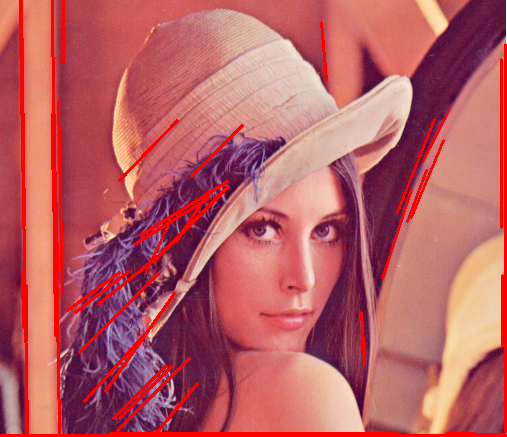

In [33]:
#9. Apply probabilistic Hough line transform on the edges detected image
#10. Display the original image with detected lines
# Apply probabilistic Hough line transform on the edges detected image
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=50, maxLineGap=5)
# Draw the detected lines on the original image

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
# Display the original image with detected lines
cv2_imshow(img)


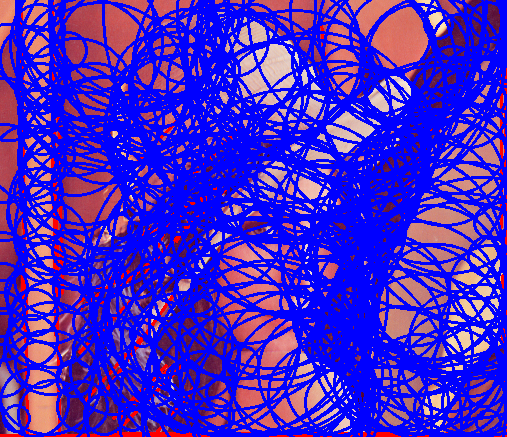

In [34]:
#11. Apply probabilistic Hough circle transform on the edges detected image
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)
# Draw the detected circles on the original image
if circles is not None:
    circles =np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (255, 0, 0), 2)
# Display the original image with detected circles
cv2_imshow(img)

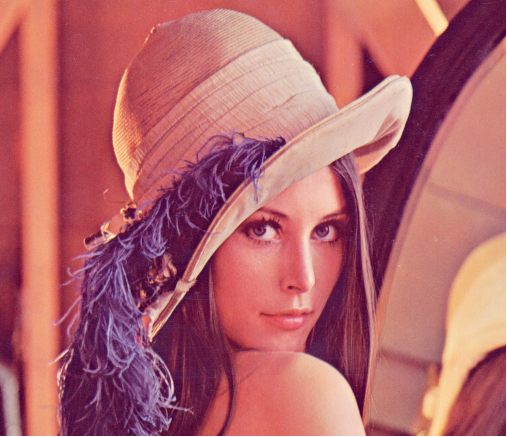

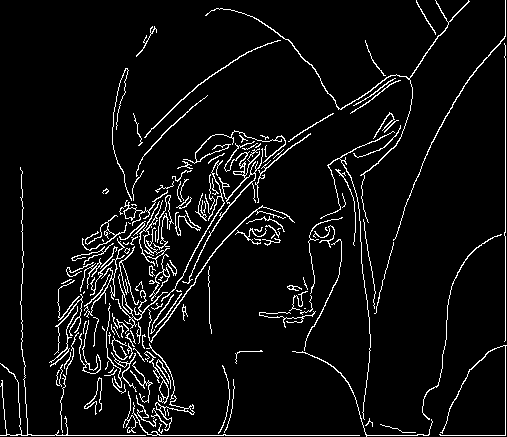

In [35]:
# Full code with imports and function definition
import cv2
import numpy as np
def detect_edges(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    return edges 
# Import the image

img = cv2.imread('abc.png')
# 1. Display the original image

cv2_imshow(img)
# 2. Detect edges in the image using the detect_edges function

edges = detect_edges(img)
# 3. Display the edges detected image
cv2_imshow(edges)


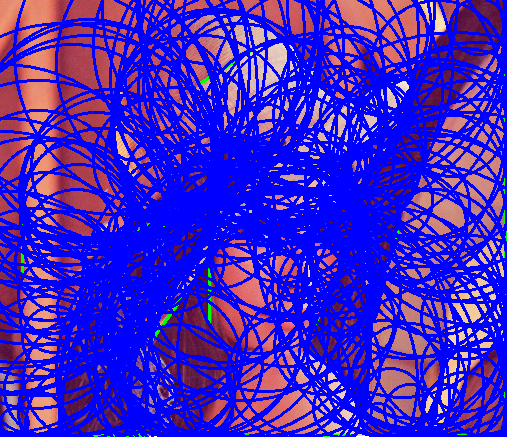

In [38]:
# 4. Apply probabilistic Hough circle transform on the edges detected image
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0) 
 # 5. Draw the detected circles on the original image
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (255, 0, 0), 2)
# 6. Display the original image with detected circles
cv2_imshow(img)